# Introductie

In deze notebook wil ik proberen te voorspellen welke aspecten van een lied de hoogste correlatie hebben met hit-nummers.

# Fase 2 Provisioning
## 2.1 Data requirements
Voordat we beginnen met de data cleanen en voorbereiden moeten we eerst de requirements weten.

- Domain: In mijn domain understanding van mijn proposal leg ik uit dat ik gekozen heb dat Spotify de stakeholder is. Omdat zij de primaire stakeholder zijn gebruik ik hun data met hun api.
##### 
- Target Variable: De target variable is of het nummer een hit of een flop is, dit heet 'target' in de dataset(s).

## 2.2 Data collectie
Het is ook belangrijk om te weten waar de data vandaan kom en waar het word opgeslagen.

- Collectie: De data die ik gebruik komt van de Api van Spotify door middel van een csv bestand.

- Opslag: De data die ik gebruik sla ik op op een publieke github, dit doe ik zodat de data niet lokaal gedownload hoeft te worden als je de notebook wilt gebruiken. Dit kan me helpen met werken vanaf andere computers en kan andere mensen helpen als het nodig is.

## 2.3 Data understanding

### Data sourcing
De dataset die ik gebruik hebben allemaal dezelfde kolommen, hier heb ik de uitleg per kolom toegevoegd, dit zijn er in totaal 20 per dataset.

De dataset is verkregen met behulp van de Spotify API:

- track: De naam van de track.

- artiest: De naam van de artiest.

- uri: De bron-identifier voor de track.

- dansbaarheid: Dansbaarheid beschrijft hoe geschikt een track is om te dansen op basis van een combinatie van muzikale elementen, waaronder tempo, ritmestabiliteit, beatsterkte en algehele regelmatigheid. Een waarde van 0.0 is het minst dansbaar en 1.0 is het meest dansbaar. 

- energie: Energie is een maat van 0.0 tot 1.0 en vertegenwoordigt een perceptuele maat van intensiteit en activiteit. Energieke tracks voelen snel, luid en luidruchtig aan. Bijvoorbeeld, death metal heeft een hoge energie, terwijl een Bach prelude laag scoort op de schaal. Waarnemingskenmerken die aan deze eigenschap bijdragen zijn onder meer dynamisch bereik, waargenomen luidheid, klankkleur, aanzetsnelheid en algemene entropie. 

- toonsoort: De geschatte toonsoort van het muziekstuk. Integers komen overeen met toonhoogtes volgens de standaard notatie van de toonhoogteklasse. Bijv. 0 = C, 1 = C/D, 2 = D, enzovoort. Als er geen toonaard is gevonden, is de waarde -1.

- Luidheid: De algehele luidheid van een track in decibels (dB). Luidheidswaarden worden gemiddeld over het gehele spoor en zijn nuttig voor het vergelijken van relatieve luidheid van sporen. Luidheid is de kwaliteit van een geluid die het primaire psychologische correlaat is van fysieke kracht (amplitude). De typische waarden liggen tussen -60 en 0 db. 

- modus: Mode geeft de modaliteit (majeur of mineur) van een track aan, het type toonladder waarvan de melodische inhoud is afgeleid. Majeur wordt weergegeven door 1 en mineur door 0.

- spraakzaamheid: Speechiness detecteert de aanwezigheid van gesproken woorden in een track. Hoe meer de opname uitsluitend op spraak lijkt (b.v. talkshow, audioboek, poëzie), hoe dichter bij 1.0 de waarde van het kenmerk ligt. Waarden boven 0.66 beschrijven tracks die waarschijnlijk geheel uit gesproken woorden bestaan. Waarden tussen 0.33 en 0.66 beschrijven tracks die zowel muziek als spraak kunnen bevatten, hetzij in delen of gelaagd, inclusief gevallen als rapmuziek. Waarden lager dan 0,33 geven hoogstwaarschijnlijk muziek en andere niet-spraak-achtige tracks weer. 

- Akoestiek: Een betrouwbaarheidsmaatstaf van 0,0 tot 1,0 voor de vraag of de track akoestisch is. 1,0 staat voor een hoge mate van vertrouwen dat het spoor akoestisch is. De verdeling van de waarden voor dit kenmerk ziet er als volgt uit:

- instrumentalness: Voorspelt of een track geen vocalen bevat. "Ooh" en "aah" geluiden worden in deze context als instrumentaal behandeld. Rap of gesproken woord tracks zijn duidelijk "vocaal". Hoe dichter de instrumentaliteitswaarde bij 1,0 ligt, des te waarschijnlijker is het dat de track geen vocale inhoud bevat. Waarden boven 0.5 zijn bedoeld voor instrumentale tracks, maar het vertrouwen is groter naarmate de waarde dichter bij 1.0 komt. De verdeling van de waarden voor dit kenmerk ziet er als volgt uit:

- levendigheid: Detecteert de aanwezigheid van een publiek in de opname. Hogere liveness-waarden geven een grotere waarschijnlijkheid aan dat de track live werd uitgevoerd. Een waarde boven 0.8 geeft een grote waarschijnlijkheid dat de track live is.

- valentie: Een maat van 0,0 tot 1,0 die de muzikale positiviteit beschrijft die door een track wordt overgebracht. Tracks met een hoge valentie klinken positiever (bijv. blij, vrolijk, euforisch), terwijl tracks met een lage valentie negatiever klinken (bijv. droevig, depressief, boos).

- tempo: Het totale geschatte tempo van een track in beats per minute (BPM). In muziekterminologie is tempo de snelheid of het tempo van een bepaald stuk en is het rechtstreeks afgeleid van de gemiddelde duur van de beat. 

- duur_ms:  De duur van de track in milliseconden.

- time_signature: Een geschatte algemene tijdshandtekening van een track. De tijd handtekening (meter) is een notatie conventie om aan te geven hoeveel beats er in elke bar (of maat) zitten.

- chorus_hit: Dit is de beste schatting van de auteur van wanneer het refrein van de track zou beginnen. Het is de tijdstempel van het begin van het derde deel van de track. Dit kenmerk is ontleend aan de gegevens die zijn ontvangen met de API-oproep voor audioanalyse van die specifieke track.

- secties: Het aantal secties dat de specifieke track heeft. Dit kenmerk is ontleend aan de gegevens die zijn ontvangen met de API-oproep voor audioanalyse van die specifieke track.

- decennium: De decennium variabele is direct door mij toegevoegd om te zien in welk decennium het nummer is gemaakt. Op deze manier kun je nog steeds zien wanneer het liedje is gemaakt nadat alle datasets worden gecombineerd in één grote dataset.

- target: De doelvariabele voor het nummer. Het kan '0' of '1' zijn. 1" impliceert dat het liedje minstens één keer in de wekelijkse lijst (uitgegeven door Billboards) van Hot-100 nummers in dat decennium heeft gestaan en dus een "hit" is. 0" betekent dat het nummer een "flop" is.

De voorwaarde van de auteur dat een track 'flop' is, is als volgt:

        - Het nummer mag niet voorkomen in de 'hit' lijst van dat decennium.
        - De artiest van het nummer mag niet voorkomen in de 'hit' lijst van dat decennium.
        - Het nummer moet behoren tot een genre dat kan worden beschouwd als niet-mainstream en/of avant-garde. 
        - Het genre van het nummer mag geen nummer in de hitlijst hebben.
        - Het nummer moet "US" als een van de markten hebben.

Dit is de metadata en heb ik heb hetzelf niet geschreven maar ik heb het wel vertaald met www.DeepL.com/Translator.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import requests
from io import StringIO

### Alle datasets toevoegen in één dataset zodat ik het later kan gebruiken

In [2]:
class dataset: 
    def __init__(self, name, url):
        self.url = url
        self.name = name

        # Alle datasets een naam geven en importeren via github zodat ze niet lokaal hoeven te staan.
datasets = [ dataset('dataset60s', 'https://raw.githubusercontent.com/Dipsaus2002/Hit-Calculator/main/Spotify-data/dataset-of-60s.csv'),
             dataset('dataset70s', 'https://raw.githubusercontent.com/Dipsaus2002/Hit-Calculator/main/Spotify-data/dataset-of-70s.csv'),
             dataset('dataset80s', 'https://raw.githubusercontent.com/Dipsaus2002/Hit-Calculator/main/Spotify-data/dataset-of-80s.csv'),
             dataset('dataset90s', 'https://raw.githubusercontent.com/Dipsaus2002/Hit-Calculator/main/Spotify-data/dataset-of-90s.csv'),
             dataset('dataset00s', 'https://raw.githubusercontent.com/Dipsaus2002/Hit-Calculator/main/Spotify-data/dataset-of-00s.csv'),
             dataset('dataset10s', 'https://raw.githubusercontent.com/Dipsaus2002/Hit-Calculator/main/Spotify-data/dataset-of-10s.csv')           
    ] 

dataframes = {}
i = 6

for dataset in datasets:
        # Uitlezen van de csv file en er een dataset van maken om hem daarna in een array te stoppen
        data = requests.get(dataset.url).text
        dataframe = pd.read_csv(StringIO(data))
        dataframes[dataset.name] = dataframe
        
        # Een nieuwe kolom toevoegen zodat je weet uit welk decennium het lied komt
        # Dit kan ik later gebruiken om te zien of de belangrijke aspecten veranderen over de decennia's heen.
        if not(i == 10 or i == 11):
            dataframe.insert(18, 'decade', 1900 + (i * 10), True)
        elif(i == 10):
        # De shape van de dataset opvragen voor en na het toevoegen van de kolom om te zien of het gelukt is.
            print('Shape van dataset00 voor het toevoegen van de kolom :', dataframes['dataset00s'].shape)
            dataframe.insert(18, 'decade', 2000, True)
            print('Shape van dataset00 na   het toevoegen van de kolom :', dataframes['dataset00s'].shape)
        elif(i == 11):
            dataframe.insert(18, 'decade', 2010, True)
        
        i += 1

        
# Het samenvoegen van alle datasets zodat ik in de toekomst geen for loops moet gebruiken.
dataset1 = [dataframes['dataset60s'], dataframes['dataset70s'], dataframes['dataset80s'], dataframes['dataset90s'], dataframes['dataset00s'], dataframes['dataset10s']]
dataset1 = pd.concat(dataset1)
dataset1['decade'] = dataset1['decade'].astype(float)

# Checken of alle decennia's in de grote dataset zitten
print( '\n', 'Alle decennia aanwezig in dataset: ', dataset1['decade'].unique()) 

Shape van dataset00 voor het toevoegen van de kolom : (5872, 19)
Shape van dataset00 na   het toevoegen van de kolom : (5872, 20)

 Alle decennia aanwezig in dataset:  [1960. 1970. 1980. 1990. 2000. 2010.]


Zo te zien is alles succesvol toegevoegd in de dataset met de extra kolom erbij.

### 2.3 Data Understanding

In [3]:
dataset1.head(5)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,decade,target
0,Jealous Kind Of Fella,Garland Green,spotify:track:1dtKN6wwlolkM8XZy2y9C1,0.417,0.620,3,-7.727,1,0.0403,0.490,0.000000,0.0779,0.845,185.655,173533,3,32.94975,9,1960.0,1
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.018,0.107000,0.1760,0.797,101.801,213613,4,48.82510,10,1960.0,0
2,Melody Twist,Lord Melody,spotify:track:6uk8tI6pwxxdVTNlNOJeJh,0.657,0.649,5,-13.392,1,0.0380,0.846,0.000004,0.1190,0.908,115.940,223960,4,37.22663,12,1960.0,0
3,Mi Bomba Sonó,Celia Cruz,spotify:track:7aNjMJ05FvUXACPWZ7yJmv,0.590,0.545,7,-12.058,0,0.1040,0.706,0.024600,0.0610,0.967,105.592,157907,4,24.75484,8,1960.0,0
4,Uravu Solla,P. Susheela,spotify:track:1rQ0clvgkzWr001POOPJWx,0.515,0.765,11,-3.515,0,0.1240,0.857,0.000872,0.2130,0.906,114.617,245600,4,21.79874,14,1960.0,0


Eerst ga ik kijken naar mijn target variable wat **target** is, is het een redelijke target variable? <br>
<br>
Omdat het een bool is met de waarde 1 of 0 heeft het geen nut om naar outliers te zoeken aangezien je die niet zo kan vinden. Daarom is het denk ik beter om te kijken naar waarden van bepaalde kolommen bij liedjes die een hit zijn met de waarde 1 en de liedjes met een waarde van 0 oftewel een flop. Dit is het makkelijkste te zien in een violin plot.

Eerst wil ik gaan kijken naar de dansbaarheid van bepaalde liedjes en hoe het is veranderd over de jaren heen.

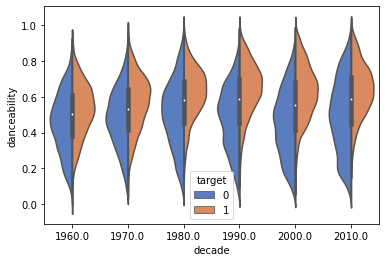

In [4]:
ax = sns.violinplot(x="decade", y="danceability", hue="target",                                                                 
                    data=dataset1, palette="muted", split=True, scale="width", width=0.8)

Hier kan ik zien dat over de jaren heen de dansbaarheid belangrijker is geworden omdat het gemiddelde van 0.5 meer naar 0.6 gestegen is. Verder kun je ook zien dat liedjes met een hogere dansbaarheid ook eerder een hit worden dan liedjes waar je moeilijk op kan dansen naarmate je verder naar de huidige tijd gaat.<br>
<br>
Nu wil ik ook kijken naar Akoestiek, energie en valentie. Hieruit kan ik zien hoe de belangrijkheid veranderd van akoestische instrumenten, hoe snel of luid een lied is en hoe positief de liedjes zijn.

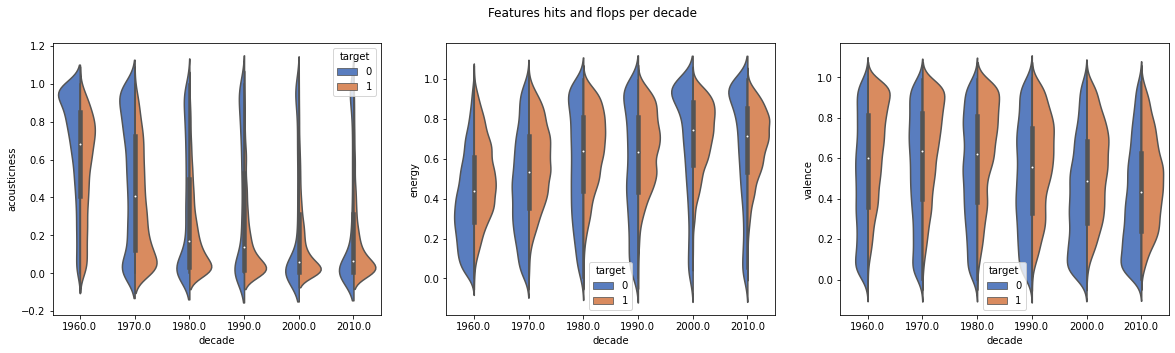

In [5]:
# Het maken van violinplots voor sommige kolommen om de belangrijkheid over de jaren heen te zien veranderen
fig, axes = plt.subplots(1,3, figsize=(20,5))
fig.suptitle('Features hits and flops per decade')

# Violinplot voor Akoestiek
sns.violinplot(ax=axes[0], x="decade", y="acousticness", hue="target",
                    data=dataset1, palette="muted", split=True)

# Violinplot voor energie
sns.violinplot(ax=axes[1], x="decade", y="energy", hue="target",
                    data=dataset1, palette="muted", split=True)

# Violinplot voor valentie
sns.violinplot(ax=axes[2], x="decade", y="valence", hue="target",
                    data=dataset1, palette="muted", split=True)

plt.show()

Hier kan ik een paar dingen uit halen:
- Na de jaren 80 is akoestiek niet echt belangrijk meer een heb je een grotere kans op hits zonder akoestische instrumenten.
- In de laatste jaren is die energie erg gestegen met een kleine afname in recente jaren. Met energie lijkt het op dat je het niet te veel moet doen aan de hoge hoeveelheid flops te zien in de laatste jaren.
- Valentie is sterk aan het dalen de laatste jaren wat ik wel verrassend vond. Ik had verwacht door de hogere energie in liedjes dat ze ook aan de blijere kant zaten maar dat blijkt juist niet zo. Wel moet je liedjes niet te verdrietig maken want dan heb je ook een hoge kan op een flop.

## Data cleaning and preparation
<br>
Nu ik een beetje weet waar mijn target variable over gaat moet ik meer naar de technische kant van mijn data kijken.

### Kijken naar null waarde
Het is altijd handig om te kijken of je geen data mist.

In [6]:
pd.isnull(dataset1).sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
decade              0
target              0
dtype: int64

Omdat we geen null waardes hebben hoeven we hier niks aan schoon te maken.

## Beschrijvende info

In [7]:
# Hier maak ik gebruik van de describe functie om te kijken of er handige info tussen zit
dataset1.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,decade,target
count,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000,4.110600e+04,41106.000000,41106.000000,41106.000000,41106.000000,41106.000000
mean,0.539695,0.579545,5.213594,-10.221525,0.693354,0.072960,0.364197,0.154416,0.201535,0.542440,119.338249,2.348776e+05,3.893689,40.106041,10.475673,1982.775264,0.500000
std,0.177821,0.252628,3.534977,5.311626,0.461107,0.086112,0.338913,0.303530,0.172959,0.267329,29.098845,1.189674e+05,0.423073,19.005515,4.871850,17.491234,0.500006
min,0.000000,0.000251,0.000000,-49.253000,0.000000,0.000000,0.000000,0.000000,0.013000,0.000000,0.000000,1.516800e+04,0.000000,0.000000,0.000000,1960.000000,0.000000
25%,0.420000,0.396000,2.000000,-12.816000,0.000000,0.033700,0.039400,0.000000,0.094000,0.330000,97.397000,1.729278e+05,4.000000,27.599792,8.000000,1970.000000,0.000000
50%,0.552000,0.601000,5.000000,-9.257000,1.000000,0.043400,0.258000,0.000120,0.132000,0.558000,117.565000,2.179070e+05,4.000000,35.850795,10.000000,1980.000000,0.500000
75%,0.669000,0.787000,8.000000,-6.374250,1.000000,0.069800,0.676000,0.061250,0.261000,0.768000,136.494000,2.667730e+05,4.000000,47.625615,12.000000,2000.000000,1.000000
max,0.988000,1.000000,11.000000,3.744000,1.000000,0.960000,0.996000,1.000000,0.999000,0.996000,241.423000,4.170227e+06,5.000000,433.182000,169.000000,2010.000000,1.000000


Hieruit kan ik niet veel nieuwe info krijgen maar ik vraag me af of er verschil zit tussen de gemiddelde waardes van flops en die van hits

In [8]:
# Hier maak ik twee nieuwe datasets, 1 voor alle hits en 1 voor alle flops
all_songs_hits = dataset1.loc[dataset1['target'] == 1]
all_songs_flops = dataset1.loc[dataset1['target'] == 0]

In [9]:
# Nu de info bekijken voor beide en kijken of er verschillen zitten tussen de twee
all_songs_flops.describe()


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,decade,target
count,20553.000000,20553.000000,20553.000000,20553.000000,20553.000000,20553.000000,20553.000000,20553.000000,20553.000000,20553.000000,20553.000000,2.055300e+04,20553.000000,20553.000000,20553.000000,20553.000000,20553.0
mean,0.478153,0.534794,5.178660,-11.740813,0.656644,0.076477,0.447581,0.278145,0.210432,0.475302,118.388219,2.436596e+05,3.849316,40.988048,10.767966,1982.775264,0.0
std,0.180844,0.290237,3.505015,6.225622,0.474841,0.094320,0.374725,0.369855,0.181864,0.279463,30.381857,1.543578e+05,0.511465,20.602145,6.237531,17.491447,0.0
min,0.057600,0.000251,0.000000,-49.253000,0.000000,0.022300,0.000000,0.000000,0.014600,0.000000,31.988000,1.516800e+04,0.000000,0.000000,0.000000,1960.000000,0.0
25%,0.346000,0.294000,2.000000,-14.938000,0.000000,0.035800,0.030500,0.000013,0.098400,0.234000,95.330000,1.633330e+05,4.000000,27.611060,7.000000,1970.000000,0.0
50%,0.483000,0.533000,5.000000,-10.664000,1.000000,0.046000,0.439000,0.010500,0.134000,0.470000,115.906000,2.140000e+05,4.000000,36.404760,10.000000,1980.000000,0.0
75%,0.610000,0.795000,8.000000,-7.122000,1.000000,0.074800,0.825000,0.682000,0.273000,0.709000,137.208000,2.818270e+05,4.000000,49.169450,12.000000,2000.000000,0.0
max,0.978000,1.000000,11.000000,3.744000,1.000000,0.960000,0.996000,1.000000,0.990000,0.996000,241.423000,4.170227e+06,5.000000,433.182000,169.000000,2010.000000,0.0


In [10]:
all_songs_hits.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,decade,target
count,20553.000000,20553.000000,20553.000000,20553.000000,20553.000000,20553.000000,20553.000000,20553.000000,20553.000000,20553.000000,20553.000000,2.055300e+04,20553.000000,20553.000000,20553.000000,20553.000000,20553.0
mean,0.601237,0.624296,5.248528,-8.702237,0.730064,0.069444,0.280814,0.030687,0.192637,0.609578,120.288280,2.260955e+05,3.938063,39.224034,10.183380,1982.775264,1.0
std,0.151532,0.198501,3.564430,3.612900,0.443937,0.076875,0.274599,0.129821,0.163090,0.236259,27.724797,6.577677e+04,0.304066,17.217213,2.897125,17.491447,0.0
min,0.000000,0.018100,0.000000,-28.030000,0.000000,0.000000,0.000002,0.000000,0.013000,0.000000,0.000000,4.689300e+04,0.000000,13.117140,3.000000,1960.000000,1.0
25%,0.502000,0.481000,2.000000,-11.124000,0.000000,0.031900,0.043300,0.000000,0.088900,0.428000,99.694000,1.817330e+05,4.000000,27.592660,8.000000,1970.000000,1.0
50%,0.610000,0.642000,5.000000,-8.273000,1.000000,0.040600,0.181000,0.000006,0.130000,0.633000,118.881000,2.204400e+05,4.000000,35.352590,10.000000,1980.000000,1.0
75%,0.708000,0.784000,8.000000,-5.881000,1.000000,0.064600,0.476000,0.000541,0.249000,0.808000,135.938000,2.578400e+05,4.000000,46.292190,12.000000,2000.000000,1.0
max,0.988000,0.997000,11.000000,2.291000,1.000000,0.950000,0.994000,0.982000,0.999000,0.991000,241.009000,1.561133e+06,5.000000,262.615400,64.000000,2010.000000,1.0


Hier vind ik het interessant om het verschil te zien in de mean van vooral danceability, energy, valence en loudness. Dit betekend dat er wel wat andere patronen zitten tussen hits en flops.

## Kijken naar correlaties
<br>
Nu wil ik kijken naar correlaties tussen de target variable en de andere kolommen. Dit wilde ik eerst apart doen voor hits en flops maar dat bleek niet te kunnen omdat target een bool waarde heeft.

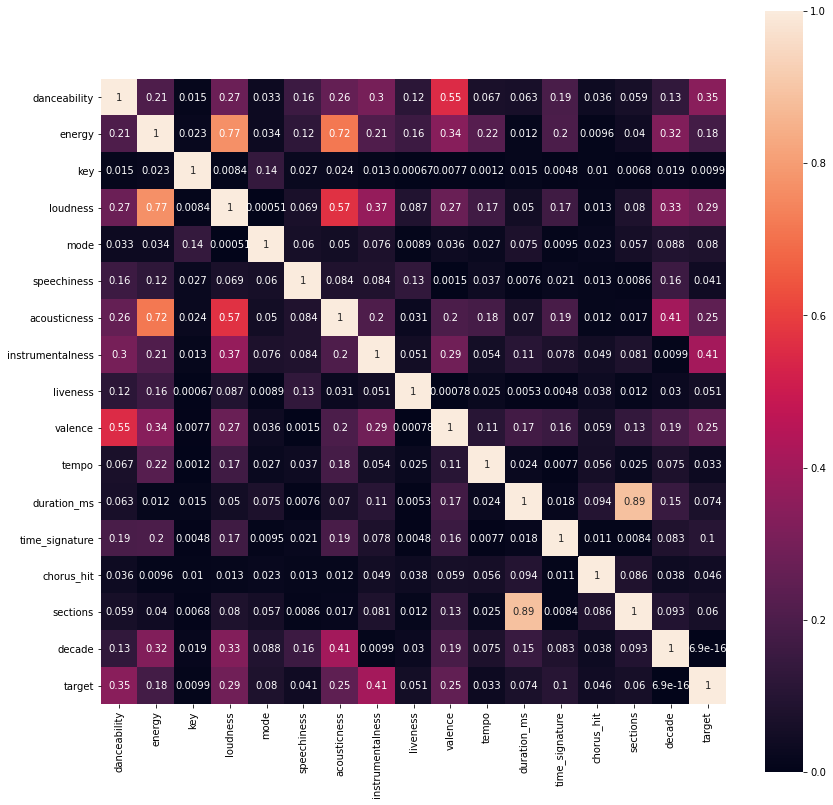

In [11]:
plt.figure(figsize=(14, 14))
ax = sns.heatmap(dataset1.corr(method='pearson').abs(), annot=True, square=True)
plt.show()

Ik had niet verwacht dat er zo weinig correlatie(s) zouden zijn met target. Verder zijn de correlaties die we hebben aan de relatieve lage kant, dit kan betekenen dat het algoritme een lage accuraatheid gaat hebben.<br>
Misschien dat ik kan gaan kijken naar de mean waarde tussen de twee datasets aangezien die in de info tabel wel verschilde met elkaar.

In [12]:
# Hier maak ik een nieuwe dataframe aan met alleen de gemiddelde waardes tussen hits en flops
hits_avg = pd.DataFrame(all_songs_hits.describe().loc['mean'])
flops_avg = pd.DataFrame(all_songs_flops.describe().loc['mean'])
all_avg = pd.concat([hits_avg,flops_avg], axis = 1)
all_avg.columns = ['hit_average', 'flop_average']

all_avg

,hit_average,flop_average
danceability,0.601237,0.478153
energy,0.624296,0.534794
key,5.248528,5.178660
loudness,-8.702237,-11.740813
mode,0.730064,0.656644
speechiness,0.069444,0.076477
acousticness,0.280814,0.447581
instrumentalness,0.030687,0.278145
liveness,0.192637,0.210432
valence,0.609578,0.475302


Hier zie ik een paar kolommen die weinig correlatie hadden met 'target' en die ook weinig verschillen met de gemiddelde waardes. Omdat deze niet veel toevoegen en het vooral wat onoverzichtelijk maken wil ik ze eerst uit de dataset filteren.

In [13]:
# Om het wat overzichtelijker te maken en om de kolommen nog wel ergens te hebben verdeel ik ze over de features van het lied zelf en de features gedefinieerd door Spotify.

# Dit zijn de features gedefinieerd door Spotify
spotify_features = ['danceability', 'energy', 'key', 'loudness','mode', 'speechiness', 'acousticness', 
                       'instrumentalness', 'liveness','valence']

# Dit zijn de features gedefinieerd door het liedje zelf, ik heb hier duration_ms weggelaten omdat die veel groter is dan alle andere kolommen
song_features = ['key', 'loudness','tempo', 'time_signature', 'chorus_hit','sections'] 

# Hier maak ik de twee datasets opnieuw maar nu met de belangrijkere features
all_songs_hits = dataset1[spotify_features].loc[dataset1['target'] == 1]
all_songs_flops = dataset1[spotify_features].loc[dataset1['target'] == 0]

Om nu de verschillen tussen de twee datasets beter te kunnen zien ga ik een bar plot maken maar daarvoor moet ik eerst de datasets aanpassen met de nieuwe kolommen.

In [14]:
# Eerst moet ik de avg datasets weer opnieuw maken maar dan met alleen de song_features
hits_avg = pd.DataFrame(all_songs_hits.describe().loc['mean'])
flops_avg = pd.DataFrame(all_songs_flops.describe().loc['mean'])
all_avg = pd.concat([hits_avg,flops_avg], axis = 1)
all_avg.columns = ['hit_average', 'flop_average']

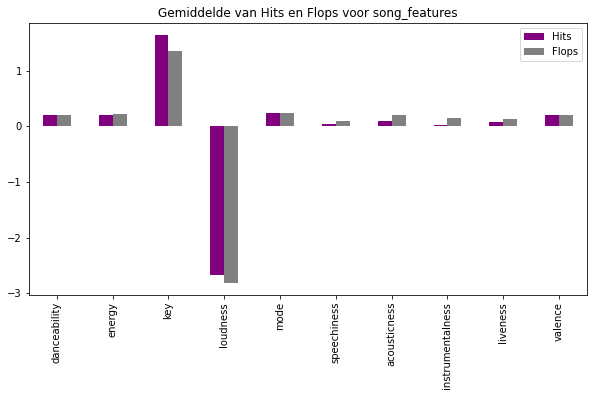

In [15]:
from sklearn.preprocessing import StandardScaler
>>> scaler = StandardScaler()

all_avg_scaled = pd.DataFrame(scaler.fit_transform(all_avg),index= all_avg.index, columns = all_avg.columns)

all_avg_scaled.plot(kind = 'bar', figsize=(10, 5), color = ('purple', 'grey'), title = 'Gemiddelde van Hits en Flops voor song_features')
plt.legend(labels=['Hits', 'Flops'], loc='upper right')
plt.show()

Door de verschillen die je ziet tussen de twee datasets ga ik ervan uit dat er wel iets van een verschillend patroon is tussen hits en flops. Hierdoor denk ik dat ik wel een redelijk model kan trainen voor het voorspellen.

# Phase 3 predictions

Nu wil ik beginnen met het voorspellen door gebruik te maken van een random tree classifier.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

# Hier filter ik de kolommen uit die niet veel toegevoegde waarden hebben zoals de uri en de titel.
indep_columns = ['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'decade']

# X = dataframes['dataset10s'][indep_columns]
# y = dataframes['dataset10s']['target']

X = dataset1[indep_columns]
y = dataset1['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0) # Hier gebruik ik 75% om te trainen en 25% om te testen
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

Om het wat beter te visualiseren ga ik een matrix plot maken en die in een heatmap stoppen.

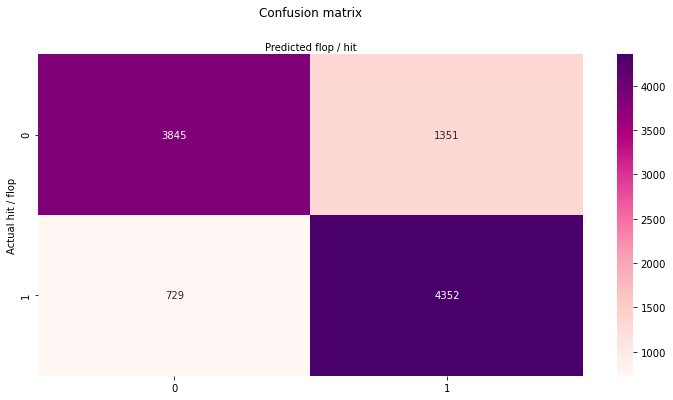

In [17]:
# De matrix zelf aanmaken
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

# Een figure/heatmap maken voor een duidelijkere visualisatie
mpl.rcParams['figure.figsize']=(10,5)
class_names=[0,1] # Naam van classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Het plotten van de heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="RdPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual hit / flop')
plt.xlabel('Predicted flop / hit')
plt.show()

Hier zie ik dat de voorspelling accuraat is maar om het iets beter te kunnen zien ga ik de scores printen.

In [18]:
print("Accuraatheid:",metrics.accuracy_score(y_test, y_pred))
print("Precisie:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuraatheid: 0.7976063053420259
Precisie: 0.7631071365947747
Recall: 0.8565243062389294


Het model is erg accuraat, precies en heeft een goede recall.

Ik wil ook kijken of dit gaat verschillen tussen de verschillende decennia dus ik wil nu het met de losse datasets doen. Maar eerst wil ik kijken welke features nou het belangrijkste zijn voor het model.

In [20]:
# Het maken van een dataframe om te zien welke variabelen het belangrijkste zijn voor het bepalen van een lied
all_songs_feat = RF.feature_importances_
df_indep_columns = pd.DataFrame(indep_columns)
df_all_songs_feat = pd.DataFrame(all_songs_feat)
all_songs_feat_vars = pd.concat([df_indep_columns, df_all_songs_feat], axis = 1)
all_songs_feat_vars.columns = ['Variable', 'Feature importance all decades']
all_songs_feat_vars = all_songs_feat_vars.set_index('Variable')
all_songs_feat_vars = all_songs_feat_vars.sort_values(by=['Feature importance all decades'], ascending = False)
all_songs_feat_vars
all_songs_feat_vars.to_csv('all_songs_feat.csv', index = False) # Maak een CSV bestand van de dataframe
all_songs_feat_vars

,Feature importance all decades
Variable,
instrumentalness,0.173625
acousticness,0.107949
danceability,0.099849
energy,0.083487
duration_ms,0.072683
loudness,0.070888
speechiness,0.069630
valence,0.064111
tempo,0.050940


Om beter te kunnen begrijpen wat de waardes zijn ten opzichte van elkaar ga ik een barplot plotten

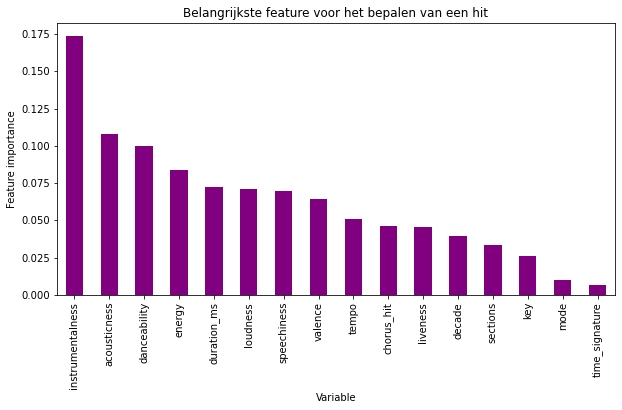

In [21]:
all_songs_feat_vars.plot(kind='bar', color = "purple", title = "Belangrijkste feature voor het bepalen van een hit", legend = None)
plt.ylabel('Feature importance')
plt.show()

Hier kunnen we zien dat instrumentalness de hoogste waarde is om te bepalen of het een hit is of niet. Dit is redelijk logisch te beredeneren aangezien liedjes waar weinig tot niet in gezongen word vaak ook niet een hit worden op een mainstream niveau.

Laten we nu gaan kijken of er ook verschillen zijn binnen verschillende decennia.

### Voorspelling voor de jaren 60

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

# Hier filter ik de kolommen uit die niet veel toegevoegde waarden hebben zoals de uri en de titel.
indep_columns = ['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'decade']

X = dataframes['dataset60s'][indep_columns]
y = dataframes['dataset60s']['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0) # Hier gebruik ik 75% om te trainen en 25% om te testen
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

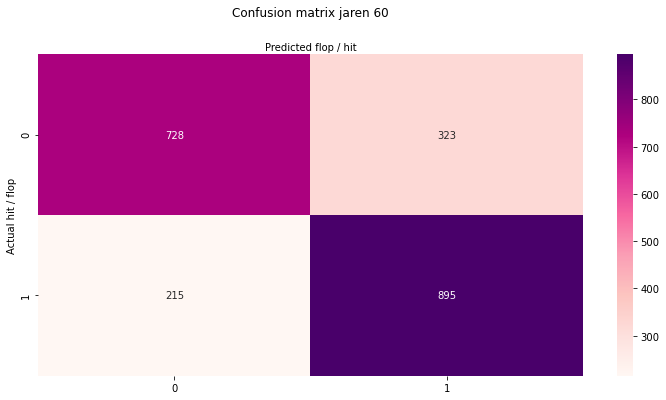

In [27]:
# De matrix zelf aanmaken
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

# Een figure/heatmap maken voor een duidelijkere visualisatie
mpl.rcParams['figure.figsize']=(10,5)
class_names=[0,1] # Naam van classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Het plotten van de heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="RdPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix jaren 60', y=1.1)
plt.ylabel('Actual hit / flop')
plt.xlabel('Predicted flop / hit')
plt.show()

In [28]:
print("Accuraatheid:",metrics.accuracy_score(y_test, y_pred))
print("Precisie:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuraatheid: 0.7510411846367423
Precisie: 0.7348111658456487
Recall: 0.8063063063063063


Ik vind het interessant om te zien dat hij nu minder accuraat geworden is. Hierdoor vraag ik me af of dat voor alle decennia geld of niet.
Laten we nu gaan kijken of de belangrijkheid van de variabelen veranderd is door de tijd heen.

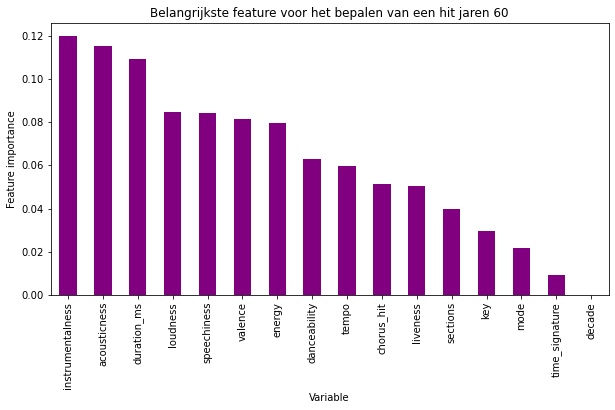

In [32]:
zestig_feat = RF.feature_importances_
df_indep_columns = pd.DataFrame(indep_columns)
df_zestig_feat = pd.DataFrame(zestig_feat)
zestig_feat_vars = pd.concat([df_indep_columns, df_zestig_feat], axis = 1)
zestig_feat_vars.columns = ['Variable', 'Feature importance jaren zestig']
zestig_feat_vars = zestig_feat_vars.set_index('Variable')
zestig_feat_vars = zestig_feat_vars.sort_values(by=['Feature importance jaren zestig'], ascending = False)
zestig_feat_vars
zestig_feat_vars.to_csv('zestig_feat_vars.csv', index = False) # Maak een CSV bestand van de dataframe

zestig_feat_vars.plot(kind='bar', color = "purple", title = "Belangrijkste feature voor het bepalen van een hit jaren 60", legend = None)
plt.ylabel('Feature importance')
plt.show()

Hier kan ik zien dan dansbaarheid veel belangrijker geworden is in de laatste jaren terwijl akoestiek veel minder belangrijk is. Verder is ook de lengte van een lied belangrijker, dit is denk ik omdat alles toen nog op platen gespeeld werd die een vaste tijdspanne hadden waardoor er weinig variatie in zou hebben gezeten.

### Voorspelling jaren 90

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

# Hier filter ik de kolommen uit die niet veel toegevoegde waarden hebben zoals de uri en de titel.
indep_columns = ['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'decade']

X = dataframes['dataset90s'][indep_columns]
y = dataframes['dataset90s']['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0) # Hier gebruik ik 75% om te trainen en 25% om te testen
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

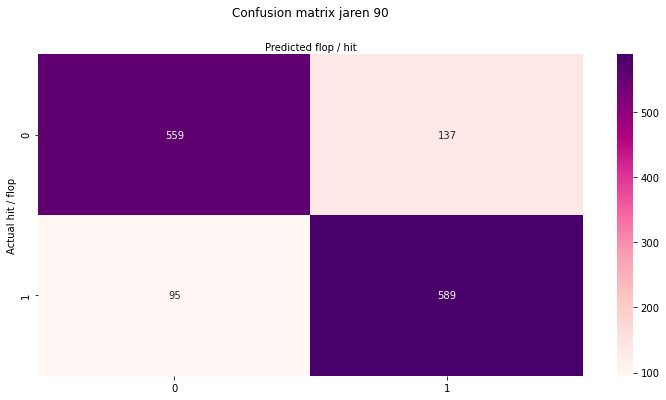

In [34]:
# De matrix zelf aanmaken
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

# Een figure/heatmap maken voor een duidelijkere visualisatie
mpl.rcParams['figure.figsize']=(10,5)
class_names=[0,1] # Naam van classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Het plotten van de heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="RdPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix jaren 90', y=1.1)
plt.ylabel('Actual hit / flop')
plt.xlabel('Predicted flop / hit')
plt.show()

In [35]:
print("Accuraatheid:",metrics.accuracy_score(y_test, y_pred))
print("Precisie:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuraatheid: 0.8318840579710145
Precisie: 0.8112947658402204
Recall: 0.8611111111111112


Hier kan ik al zijn dat mijn gedachten van de jaren 60 niet klopt aangezien dit model een beter accuraatheid heeft dan alle decennia bij elkaar.

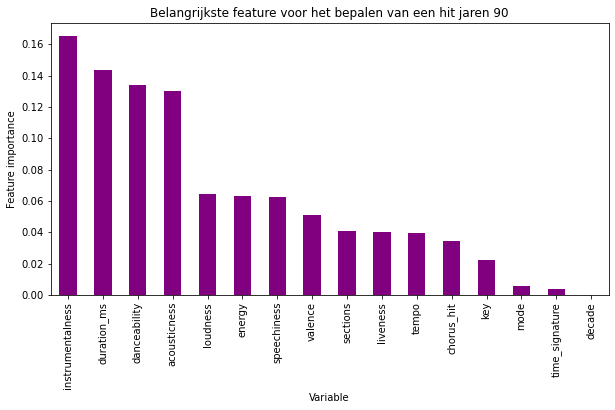

In [37]:
negentig_feat = RF.feature_importances_
df_indep_columns = pd.DataFrame(indep_columns)
df_negentig_feat = pd.DataFrame(negentig_feat)
negentig_feat_vars = pd.concat([df_indep_columns, df_negentig_feat], axis = 1)
negentig_feat_vars.columns = ['Variable', 'Feature importance jaren negentig']
negentig_feat_vars = negentig_feat_vars.set_index('Variable')
negentig_feat_vars = negentig_feat_vars.sort_values(by=['Feature importance jaren negentig'], ascending = False)
negentig_feat_vars
negentig_feat_vars.to_csv('negentig_feat_vars.csv', index = False) # Maak een CSV bestand van de dataframe

negentig_feat_vars.plot(kind='bar', color = "purple", title = "Belangrijkste feature voor het bepalen van een hit jaren 90", legend = None)
plt.ylabel('Feature importance')
plt.show()

Hier zie ik dat dansbaarheid erg veel is toegenomen sinds de jaren zestig. Verder is de lengte van het lied nog steeds belangrijk, waarschijnlijk doordat je nu met cd's bezig was (singels etc). Ik had verwacht dat akoestiek wel minder belangrijk zou zijn geworden maar dat valt wel mee.

### Voorspelling 2010

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import scale

# Hier filter ik de kolommen uit die niet veel toegevoegde waarden hebben zoals de uri en de titel.
indep_columns = ['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'decade']

X = dataframes['dataset10s'][indep_columns]
y = dataframes['dataset10s']['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0) # Hier gebruik ik 75% om te trainen en 25% om te testen
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

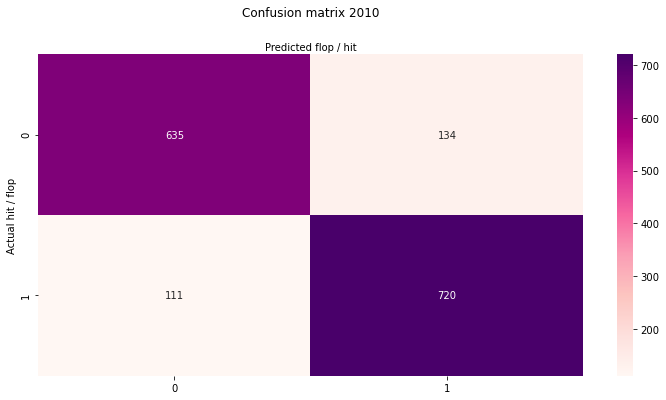

In [39]:
# De matrix zelf aanmaken
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

# Een figure/heatmap maken voor een duidelijkere visualisatie
mpl.rcParams['figure.figsize']=(10,5)
class_names=[0,1] # Naam van classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Het plotten van de heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="RdPu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix 2010', y=1.1)
plt.ylabel('Actual hit / flop')
plt.xlabel('Predicted flop / hit')
plt.show()

In [40]:
print("Accuraatheid:",metrics.accuracy_score(y_test, y_pred))
print("Precisie:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuraatheid: 0.846875
Precisie: 0.8430913348946136
Recall: 0.8664259927797834


Deze is nog accurater. Hierdoor denk ik dat hits makkelijker te voorspellen zijn met latere decennia. Ik weet nog niet precies waardoor dit is maar ik hoop dat te kunnen zien aan de feature importance.

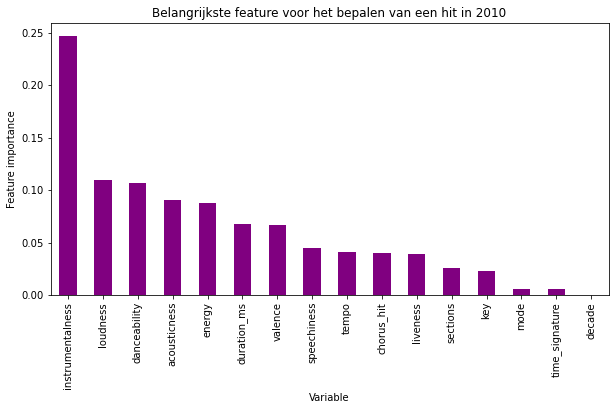

In [41]:
tien_feat = RF.feature_importances_
df_indep_columns = pd.DataFrame(indep_columns)
df_tien_feat = pd.DataFrame(tien_feat)
tien_feat_vars = pd.concat([df_indep_columns, df_tien_feat], axis = 1)
tien_feat_vars.columns = ['Variable', 'Feature importance 2010']
tien_feat_vars = tien_feat_vars.set_index('Variable')
tien_feat_vars = tien_feat_vars.sort_values(by=['Feature importance 2010'], ascending = False)
tien_feat_vars
tien_feat_vars.to_csv('tien_feat_vars.csv', index = False) # Maak een CSV bestand van de dataframe

tien_feat_vars.plot(kind='bar', color = "purple", title = "Belangrijkste feature voor het bepalen van een hit in 2010", legend = None)
plt.ylabel('Feature importance')
plt.show()

Hier valt me op dat de lengte van een lied al veel minder belangrijk is. Ook valt het me op hoe belangrijk instrumentalness wel niet is in dit decennia. 